In [ ]:
'''

测试算法：朴素贝叶斯

测试数据集：dred数据集
----------------
    描述：选取电视、冰箱、电脑和加热器四种电器
    时长：2015-08-15 9：15至2015-08-15 10:00，共45分钟
    数量：压缩前10804个数据，压缩后2160个数据
    
测试结果：准确率75%

'''

In [1]:
#check path
import sys
if '..' not in sys.path:
    sys.path.append('..')

In [2]:
#import tools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from disaggregate.data_extender import extend_and_combine
from disaggregate.pca_and_bayes import *
%matplotlib inline

In [3]:
#define a plot function
color_list = ['r', 'y', 'g', 'c', 'b', 'm', 'k', 'w']
def plot(*raws):
    plt.figure(figsize = [20, 20])
    for index, raw in enumerate(raws):
        plt.plot(raw.index, raw.values, color_list[index])
    plt.show()

In [4]:
#import data
with pd.HDFStore('../dataset_test/DRED.h5') as f:
    tv = f.get('/building1/elec/meter2')['power']['apparent']['2015-08-15 9:15:00+05:30':'2015-08-15 10:00:00+05:30']
    fg = f.get('/building1/elec/meter4')['power']['apparent']['2015-08-15 9:15:00+05:30':'2015-08-15 10:00:00+05:30']
    cp = f.get('/building1/elec/meter5')['power']['apparent']['2015-08-15 9:15:00+05:30':'2015-08-15 10:00:00+05:30']
    hp = f.get('./building1/elec/meter6')['power']['apparent']['2015-08-15 9:15:00+05:30':'2015-08-15 10:00:00+05:30']

/home/redbeancakeli/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


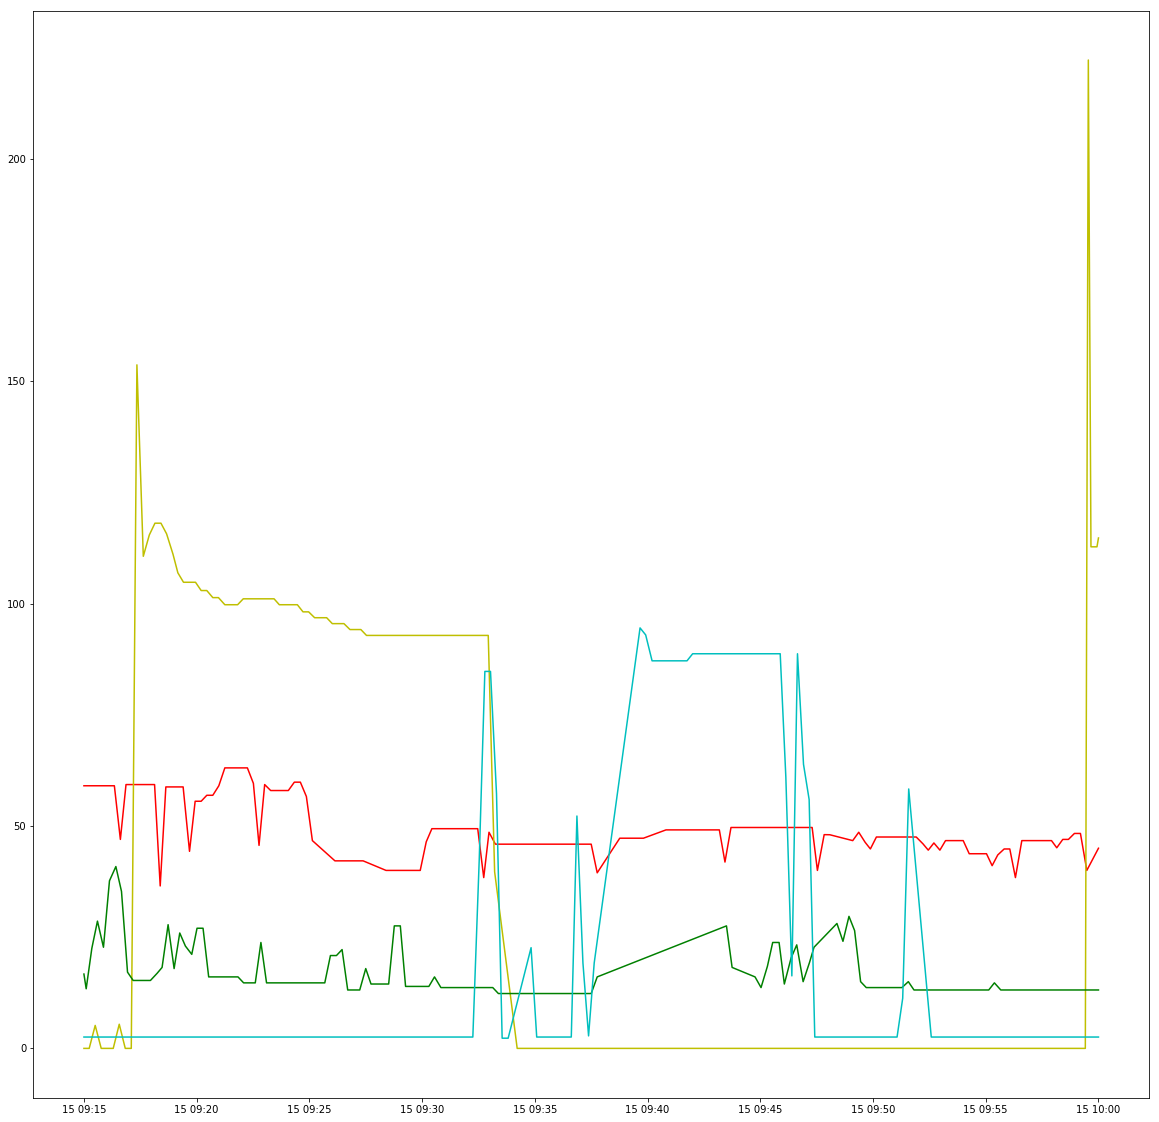

In [5]:
#plot data
plot(tv, fg, cp, hp)

In [6]:
#entend and combine dataset
dataset, labels = extend_and_combine(5, tv.values, fg.values, cp.values, hp.values)

extending dataset 0  size: (2701,) 

combining dataset 0  size: (540, 8) 

extending dataset 1  size: (2701,) 

combining dataset 1  size: (540, 8) 

extending dataset 2  size: (2701,) 

combining dataset 2  size: (540, 8) 

extending dataset 3  size: (2701,) 

combining dataset 3  size: (540, 8) 

done!


In [7]:
#split dataset
x_train,x_test,y_train,y_test = train_test_split(dataset, labels, test_size = 0.3)

Trained: displaying 100 % data...



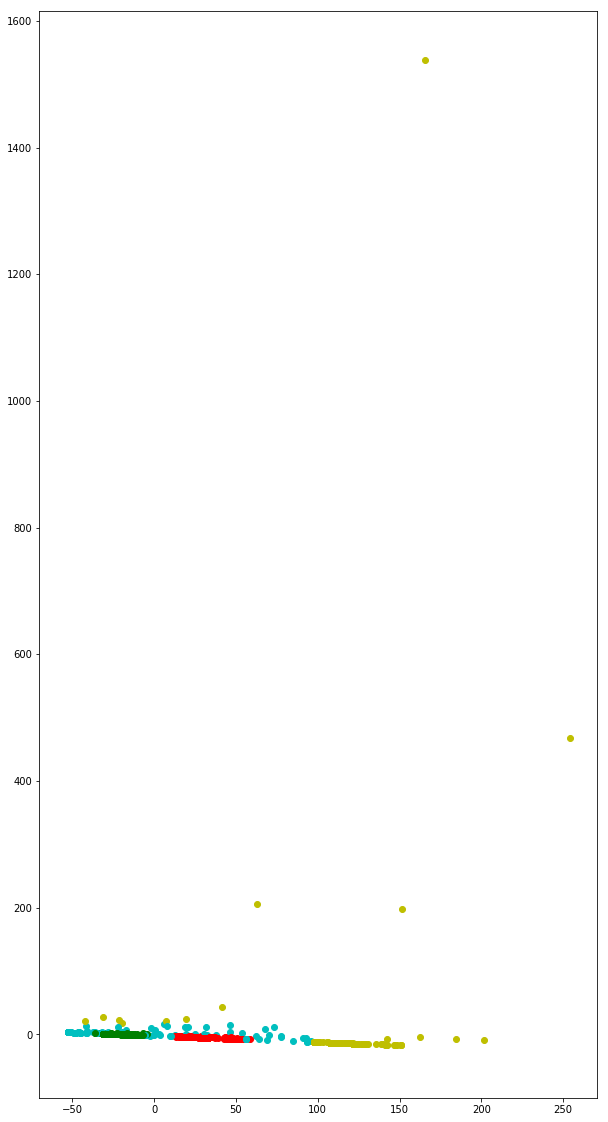

True: displaying 100 % data...



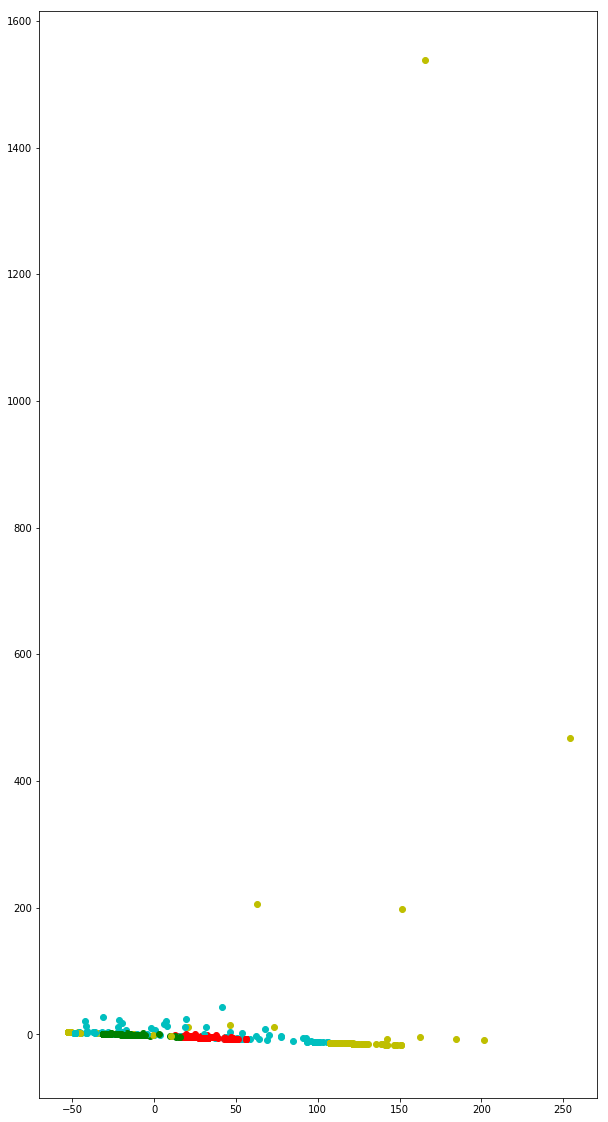

In [8]:
#train dataset
model = train(x_train, y_train, 4)

Predict: displaying 100 % data...



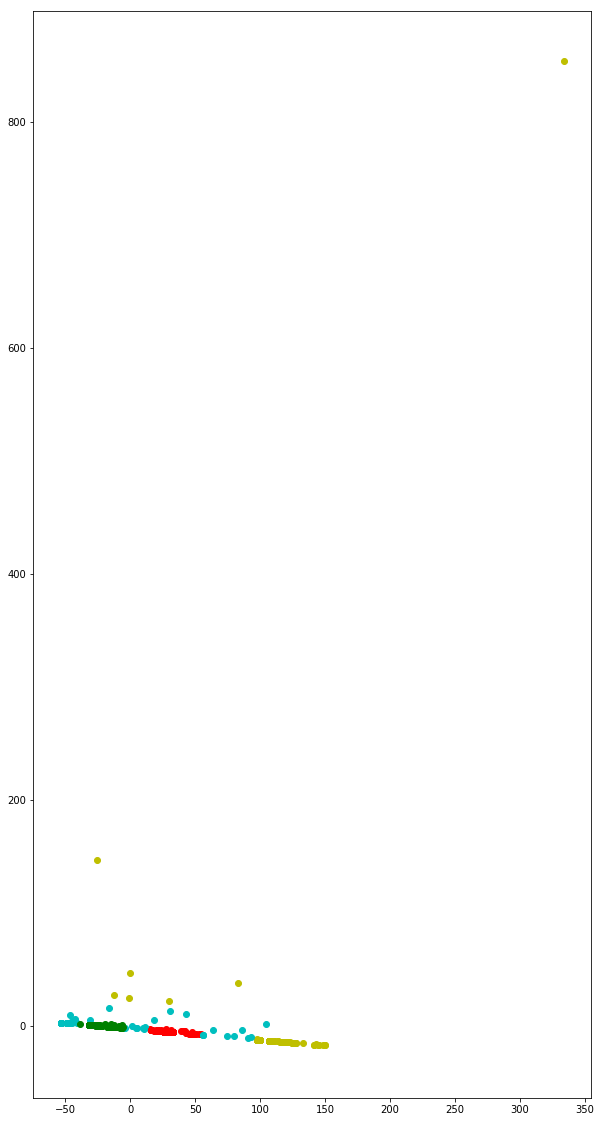

True: displaying 100 % data...



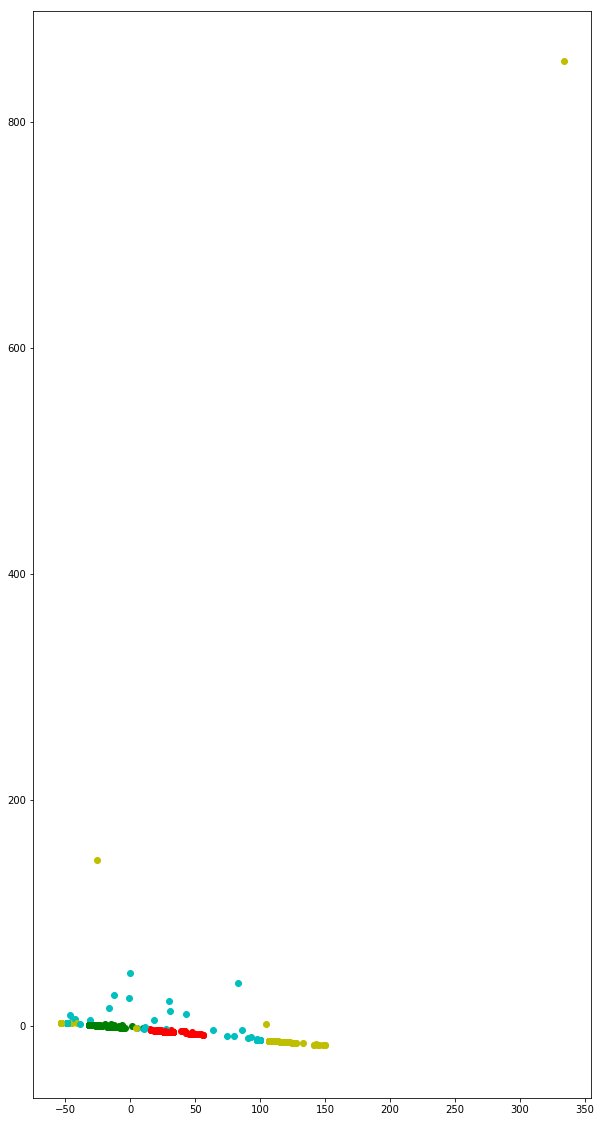

In [9]:
#predict
pred = predict_all(x_test, y_test, 4, model)

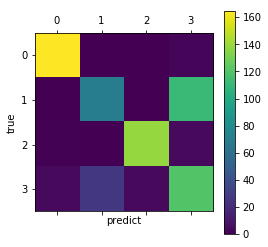

[[165   0   0   3]
 [  0  70   0 111]
 [  1   0 139   4]
 [  4  27   4 120]]


In [10]:
#confusion matrix
cm = confusion_matrix(y_test, pred)
plt.matshow(cm)
plt.colorbar()
plt.xlabel('predict')
plt.ylabel('true')
plt.show()
print(cm)

In [11]:
#accuracy
acc = sum(cm.diagonal())/sum(sum(cm))
print('accuracy: ', acc*100, '%')

accuracy:  76.23456790123457 %
